In [113]:
reload_toocan = False # part of code that takes long time

<span style="color:pink">## choose subregion</span>

In [136]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

<span style="color:pink">## choose attribute (listed in code below in toocan[0])</span>

In [137]:
attribute = "dist"

<span style="color:pink">## choose MCS index and attribute (when plotting a single MCS, which MCS do you want to look at? Which attribute?). attributes listed in code blow in under toocan[36].clusters</span>

In [138]:
MCS_idx = 0
attribute_single_MCS = "surfkm2_132Wm2"

<span style="color:pink">## choose single timestep index for prec</span>

In [139]:
prec_idx = 5

<span style="color:pink">## choose extreme percentile</span>

In [140]:
percentile = 99.999

<span style="color:pink">##</span>

# Imports

In [141]:
%reload_ext autoreload
%matplotlib inline

In [142]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [143]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [144]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [145]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [146]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [147]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [148]:
# to access an attribute over time:
toocan[36].clusters.surfkm2_132Wm2

[96.0,
 592.0,
 1248.0,
 1136.0,
 848.0,
 944.0,
 2288.0,
 4048.0,
 6384.0,
 10912.0,
 16576.0,
 20000.0,
 20320.0,
 18288.0,
 14976.0,
 11616.0,
 8880.0,
 4288.0,
 1088.0,
 96.0,
 64.0,
 0.0]

In [149]:
toocan[36].clusters

< MCS_Lifecycle object:
 . qc_im: <class 'list'>
 . olrmin: <class 'list'>
 . olravg_172Wm2: <class 'list'>
 . olravg_110Wm2: <class 'list'>
 . olravg_90Wm2: <class 'list'>
 . olr_90th: <class 'list'>
 . surfPix_172Wm2: <class 'list'>
 . surfPix_110Wm2: <class 'list'>
 . surfKm2: []
 . Utime: <class 'list'>
 . Localtime: <class 'list'>
 . lon: <class 'list'>
 . lat: <class 'list'>
 . x: <class 'list'>
 . y: <class 'list'>
 . velocity: <class 'list'>
 . semiminor_132Wm2: <class 'list'>
 . semimajor_132Wm2: <class 'list'>
 . orientation_132Wm2: <class 'list'>
 . excentricity_132Wm2: <class 'list'>
 . semiminor_172Wm2: <class 'list'>
 . semimajor_172Wm2: <class 'list'>
 . orientation_172Wm2: <class 'list'>
 . excentricity_172Wm2: <class 'list'>
 . surfkm2_172Wm2: <class 'list'>
 . surfkm2_132Wm2: <class 'list'>
 . surfkm2_110Wm2: <class 'list'>
 . surfkm2_90Wm2: <class 'list'>
 >

In [150]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

In [151]:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

# Convert dates

In [152]:
data_reference = dt.datetime(1970, 1, 1)

In [153]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    Localtime_list = obj.clusters.Localtime
    
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    date_list = [( data_reference + dt.timedelta(days=ltime) ) for ltime in Localtime_list]
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [154]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-08-01 12:07:29.280000
2016-08-03 00:48:31.680000


In [155]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]
    return attribute_values

# Plotting birth and death counts simultaneously

In [156]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    Localtime_list = obj.clusters.Localtime
    
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    date_list = [( data_reference + dt.timedelta(days=ltime) ) for ltime in Localtime_list]
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [157]:
Utime_Init_list = [( data_reference + dt.timedelta(days=UInit_time) ) for UInit_time in (attr_list(toocan, "Utime_Init"))]
Utime_End_list = [( data_reference + dt.timedelta(days=UEnd_time) ) for UEnd_time in (attr_list(toocan, "Utime_End"))]

# STRANGE
* Utime_Init_list and Utime_End_list don't contain hours between 12h-23h. This can be seen in one of the plots below where I zoom in to a region
    * In the first two below, I look at indices 45 and 1914 and the way they are calculated seems correct
    * In the third cell below, I check a specific UTC (17053.45) given in df, and the dates do not match
    * In the fourth cell below, I check whether the 12-23h range is possible (it is)
* It seems like there is not the same amount of data for PW. I am unable to retrieve files for which the timestep is below 0000200400, or here where reg_start_idx is below 416. It's strange because this data does exist for Prec, but the same issue was present when I was using the hard drive data.
    * Possibly related to this, it seems like the cyclone is not associated with the peak in the data at the beginning, but instead with the middle of the data, which seems very unlikely. If you set reg_start_idx or reg_end_idx to 500, you can see the cyclone. I would've instead expected it within the index range of 0:50. Possibly, the binning is being done incorrectly and there is a big mismatch in dates.
    
* These problems are driving me crazy :(

In [208]:
print("reference: ", data_reference)
t_i = 45
print("Utime_Init: ", (attr_list(toocan, "Utime_Init")[t_i]))
print("timedelta: ", dt.timedelta(days=(attr_list(toocan, "Utime_Init")[t_i])))
print("datetime date: ", data_reference + dt.timedelta(days=(attr_list(toocan, "Utime_Init")[t_i])) )

reference:  1970-01-01 00:00:00
Utime_Init:  17014.48
timedelta:  17014 days, 11:31:12
datetime date:  2016-08-01 11:31:12


In [209]:
print("reference: ", data_reference)
t_i = 1914
print("Utime_Init: ", (attr_list(toocan, "Utime_Init")[t_i]))
print("timedelta: ", dt.timedelta(days=(attr_list(toocan, "Utime_Init")[t_i])))
print("datetime date: ", data_reference + dt.timedelta(days=(attr_list(toocan, "Utime_Init")[t_i])) )

reference:  1970-01-01 00:00:00
Utime_Init:  17015.26
timedelta:  17015 days, 6:14:24
datetime date:  2016-08-02 06:14:24


In [210]:
print("From df:\nUnnamed: 0	Unnamed: 0.4	Unnamed: 0.3	Unnamed: 0.2	img_seg_path	str_code	Unnamed: 0.1	Unnamed: 0.1.1	year	month	day	hour	minute	path_dyamond	UTC\n")
print("1914	1295	1295.0	1295.0	1295.0	data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...	2016-9-9-22-30	1916.0	1916.0	2016.0	9.0	9.0	22.0	30.0	DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080	17053.45")
print("----------------------")
print(dt.timedelta(days=17053.45))
print( data_reference + dt.timedelta(days=17053.45) )

From df:
Unnamed: 0	Unnamed: 0.4	Unnamed: 0.3	Unnamed: 0.2	img_seg_path	str_code	Unnamed: 0.1	Unnamed: 0.1.1	year	month	day	hour	minute	path_dyamond	UTC

1914	1295	1295.0	1295.0	1295.0	data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...	2016-9-9-22-30	1916.0	1916.0	2016.0	9.0	9.0	22.0	30.0	DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080	17053.45
----------------------
17053 days, 10:48:00
2016-09-09 10:48:00


In [211]:
print("checking if 12h-23h range is possible:")
print(dt.timedelta(days=17053.85))
print( data_reference + dt.timedelta(days=17053.85) )

checking if 12h-23h range is possible:
17053 days, 20:24:00
2016-09-09 20:24:00


### as line plot

0       2016-08-01 01:30:00
1       2016-08-01 01:00:00
2       2016-08-01 03:30:00
3       2016-08-01 03:00:00
4       2016-08-01 04:00:00
                ...        
29675   2016-08-31 10:30:00
29676   2016-08-31 11:00:00
29677   2016-08-31 11:00:00
29678   2016-08-31 11:00:00
29679   2016-08-31 11:30:00
Length: 29680, dtype: datetime64[ns]


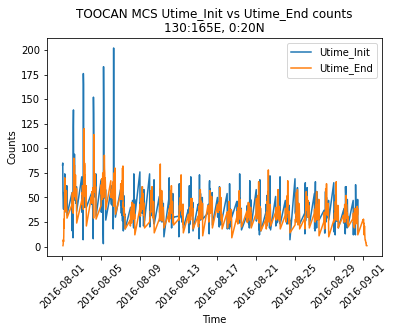

743
29680
<xarray.DataArray ()>
array(29680)
Coordinates:
    time     datetime64[ns] 2016-08-31T11:30:00


In [216]:
# convert to a pandas Series
time_series_Init = pd.Series(Utime_Init_list)
time_series_End = pd.Series(Utime_End_list)

# bin size of 1/2 hour
binsize = '30T'

# group the data into bins 
binned_data_series_Init = time_series_Init.groupby(time_series_Init.dt.floor(binsize)).count()
binned_data_series_End = time_series_End.groupby(time_series_End.dt.floor(binsize)).count()

print(time_series_Init.dt.floor(binsize))

# convert to an xarray DataArray
binned_data_Init = xr.DataArray(binned_data_series_Init.values, dims='time', coords={'time': binned_data_series_Init.index})
binned_data_End = xr.DataArray(binned_data_series_End.values, dims='time', coords={'time': binned_data_series_End.index})

# line plot
plt.plot(binned_data_Init.coords['time'], binned_data_Init, label="Utime_Init")
plt.plot(binned_data_End.coords['time'], binned_data_End, label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()
print(len(binned_data_Init))
print(len(Utime_Init_list))
print(sum(binned_data_Init))

# Zooming in to region 1

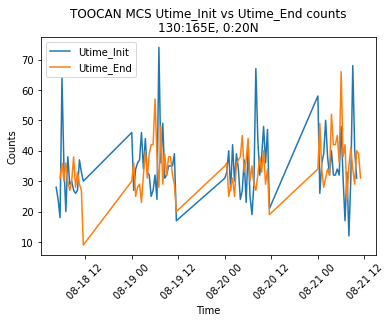

In [205]:
# line plot

reg_start_idx = 416
reg_end_idx = 500


plt.plot(binned_data_Init.coords['time'][reg_start_idx:reg_end_idx], binned_data_Init[reg_start_idx:reg_end_idx], label="Utime_Init")
plt.plot(binned_data_End.coords['time'][reg_start_idx:reg_end_idx], binned_data_End[reg_start_idx:reg_end_idx], label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()



In [206]:
#- Convert the time of range

for i in range(2):
    if i == 0:
        reg_date = binned_data_Init.coords['time'][reg_start_idx]
    else:
        reg_date = binned_data_Init.coords['time'][reg_end_idx]
    timestamp = pd.to_datetime(str(reg_date.values))
    reg_timestep = (timestamp - pd.Timestamp('1970-01-01')) / pd.Timedelta(days=1)
    time_i = ( np.where(df['UTC'] > reg_timestep) )[0][0]
    reg_DYAMOND_timestamp = df['path_dyamond'][time_i][35:45]
    if i == 0:
        reg_DYAMOND_timestamp_begin = reg_DYAMOND_timestamp
    else:
        reg_DYAMOND_timestamp_end = reg_DYAMOND_timestamp


working
/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000200400.PW.2D.nc


<ipython-input-165-d431591e19d3>:56: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variable_data = dataset.variables[variable][:]
<ipython-input-165-d431591e19d3>:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = dataset.variables['lon'][:]
<ipython-input-165-d431591e19d3>:59: DeprecationWarning: `np.bool` is a deprecated alias for the builti

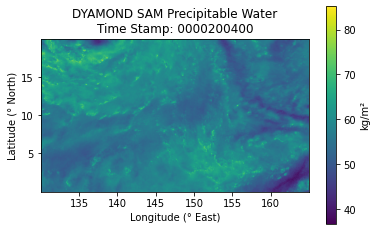

working
/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000240960.PW.2D.nc


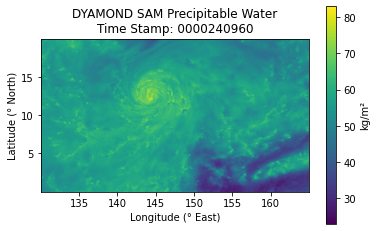

In [207]:
#- Plot

plot_singletime_var("PW", reg_DYAMOND_timestamp_begin)
plot_singletime_var("PW", reg_DYAMOND_timestamp_end)

# Zoom into region 1 further

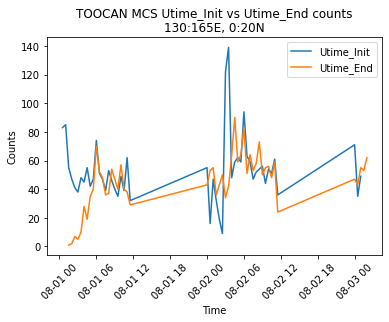

<xarray.DataArray 'time' (time: 50)>
array(['2016-08-01T00:30:00.000000000', '2016-08-01T01:00:00.000000000',
       '2016-08-01T01:30:00.000000000', '2016-08-01T02:00:00.000000000',
       '2016-08-01T02:30:00.000000000', '2016-08-01T03:00:00.000000000',
       '2016-08-01T03:30:00.000000000', '2016-08-01T04:00:00.000000000',
       '2016-08-01T04:30:00.000000000', '2016-08-01T05:00:00.000000000',
       '2016-08-01T05:30:00.000000000', '2016-08-01T06:00:00.000000000',
       '2016-08-01T06:30:00.000000000', '2016-08-01T07:00:00.000000000',
       '2016-08-01T07:30:00.000000000', '2016-08-01T08:00:00.000000000',
       '2016-08-01T08:30:00.000000000', '2016-08-01T09:00:00.000000000',
       '2016-08-01T09:30:00.000000000', '2016-08-01T10:00:00.000000000',
       '2016-08-01T10:30:00.000000000', '2016-08-01T11:00:00.000000000',
       '2016-08-01T11:30:00.000000000', '2016-08-02T00:00:00.000000000',
       '2016-08-02T00:30:00.000000000', '2016-08-02T01:00:00.000000000',
       '2016-0

In [166]:
# line plot
plt.plot(binned_data_Init.coords['time'][0:50], binned_data_Init[0:50], label="Utime_Init")
plt.plot(binned_data_End.coords['time'][0:50], binned_data_End[0:50], label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()
print(binned_data_Init.coords['time'][0:50])

### convolve for births and deaths

In [167]:
num_int_per_day = 24
kernel = np.ones(num_int_per_day) / num_int_per_day

In [168]:
convolved_Init = np.convolve(binned_data_Init, kernel, mode='same')
convolved_End = np.convolve(binned_data_End, kernel, mode='same')

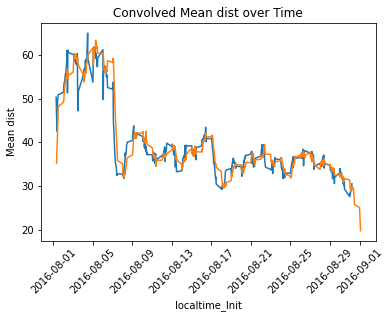

In [169]:
# Create a figure and axes
fig, ax = plt.subplots()

plt.plot((binned_data_Init.coords['time'])[12:-12], convolved_Init[12:-12], label="Utime_Init")
plt.plot((binned_data_End.coords['time'])[12:-12], convolved_End[12:-12], label="Utime_End")

plt.xticks(rotation=45)
ax.set_xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Convolved Mean ' + attribute + ' over Time')


plt.show()

### diurnal cycle for births and deaths

<xarray.DataArray 'time' (time: 743)>
array(['2016-08-01T00:30:00.000000000', '2016-08-01T01:00:00.000000000',
       '2016-08-01T01:30:00.000000000', ..., '2016-08-31T10:30:00.000000000',
       '2016-08-31T11:00:00.000000000', '2016-08-31T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-08-01T00:30:00 ... 2016-08-31T11:30:00


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


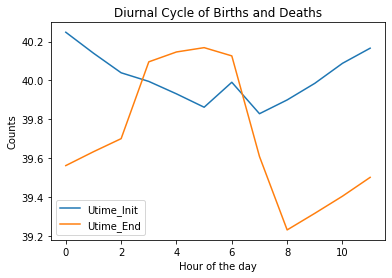

In [170]:
import datetime
# convert to datetime objects
def convert_datetime64_to_datetime(dt64):
    dt = np.datetime_as_string(dt64, unit='s')
    return datetime.datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S')

# convert to hours of the day
hours_Init = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_Init.time.data[12:-12]]
hours_End = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_End.time.data[12:-12]]

print((binned_data_Init.coords['time']))
# average value for each hour of the day
diurnal_hours = range(24)  # 24 hours in a day
diurnal_cycle_Init = []
diurnal_cycle_End = []
for hour in diurnal_hours:
    # make list called values
    # if the hour in the data matches the hour in the current loop, append the data value to values list
    # find the mean for the hour in the current loop (e.g. average of all data in hour 20)
    values_Init = [value_Init for value_Init, h_Init in zip(convolved_Init, hours_Init) if h_Init == hour]
    values_End = [value_End for value_End, h_End in zip(convolved_End, hours_End) if h_End == hour]
    
    average_Init = np.mean(values_Init)
    average_End = np.mean(values_End)
    
    diurnal_cycle_Init.append(average_Init)
    diurnal_cycle_End.append(average_End)

# plot
plt.plot(diurnal_hours, diurnal_cycle_Init, label="Utime_Init")
plt.plot(diurnal_hours, diurnal_cycle_End, label="Utime_End")
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

### diurnal cycle using np.reshapeprint(diurnal_data.shape)
* this currently ignores the first and last 12 hours of each day to prevent boundary effects
* then, it ignores another 12 hours for Init and 21 hours for End to fit reshaping data


In [171]:
diurnal_hours = range(24)  # 24 hours in a day
for i in range(2):
    if i == 0:
        binned_data = binned_data_Init
        convolved_data = convolved_Init
        label = "Utime_Init"
        
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+12)]
    else:
        binned_data = binned_data_End
        convolved_data = convolved_End
        label = "Utime_End"
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+21)]
    

    # axes for reshaping. ndays calculated based on the length of data
    ndays = diurnal_data.shape[0] // 24
    nhours = 24

    diurnal_cycle = np.mean(np.reshape(diurnal_data, (nhours, ndays)), axis=1)

    # plot
    plt.plot(diurnal_hours, diurnal_cycle, label=label)
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

ValueError: cannot reshape array of size 707 into shape (24,29)